In [1]:
import numpy as np
import pandas as pd
import sys
import warnings
import sklearn
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve,auc, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import sensitive_score, specificity_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
cols=['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','AScore',
'Cscore','Impulsive','SS','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke',
'Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
df=pd.read_csv(r'C:\Users\saket\OneDrive\Desktop\UOttawa files\ML A1\drug_consumption.data',names=cols,delimiter=",")
df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [4]:
headers = list(df.columns.values)
print("Header columns:", headers)

Header columns: ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   AScore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [6]:
df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [7]:
df2=df.apply(lambda x: x.replace({'CL0':'0', 'CL1':'0','CL2':'1','CL3':'1','CL4':'1', 'CL5':'1','CL6':'1'}, regex=True))
print(df2)

        ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0        1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1        2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2        3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3        4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4        5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
...    ...      ...      ...        ...      ...        ...      ...      ...   
1880  1884 -0.95197  0.48246   -0.61113 -0.57009   -0.31685 -1.19430  1.74091   
1881  1885 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.24649  1.74091   
1882  1886 -0.07854  0.48246    0.45468 -0.57009   -0.31685  1.13281 -1.37639   
1883  1887 -0.95197  0.48246   -0.61113 -0.57009   -0.31685  0.91093 -1.92173   
1884  1888 -0.95197 -0.48246   -0.61113  0.21128   -0.31685 -0.46725  2.12700   

       Oscore   AScore  ...

<AxesSubplot:>

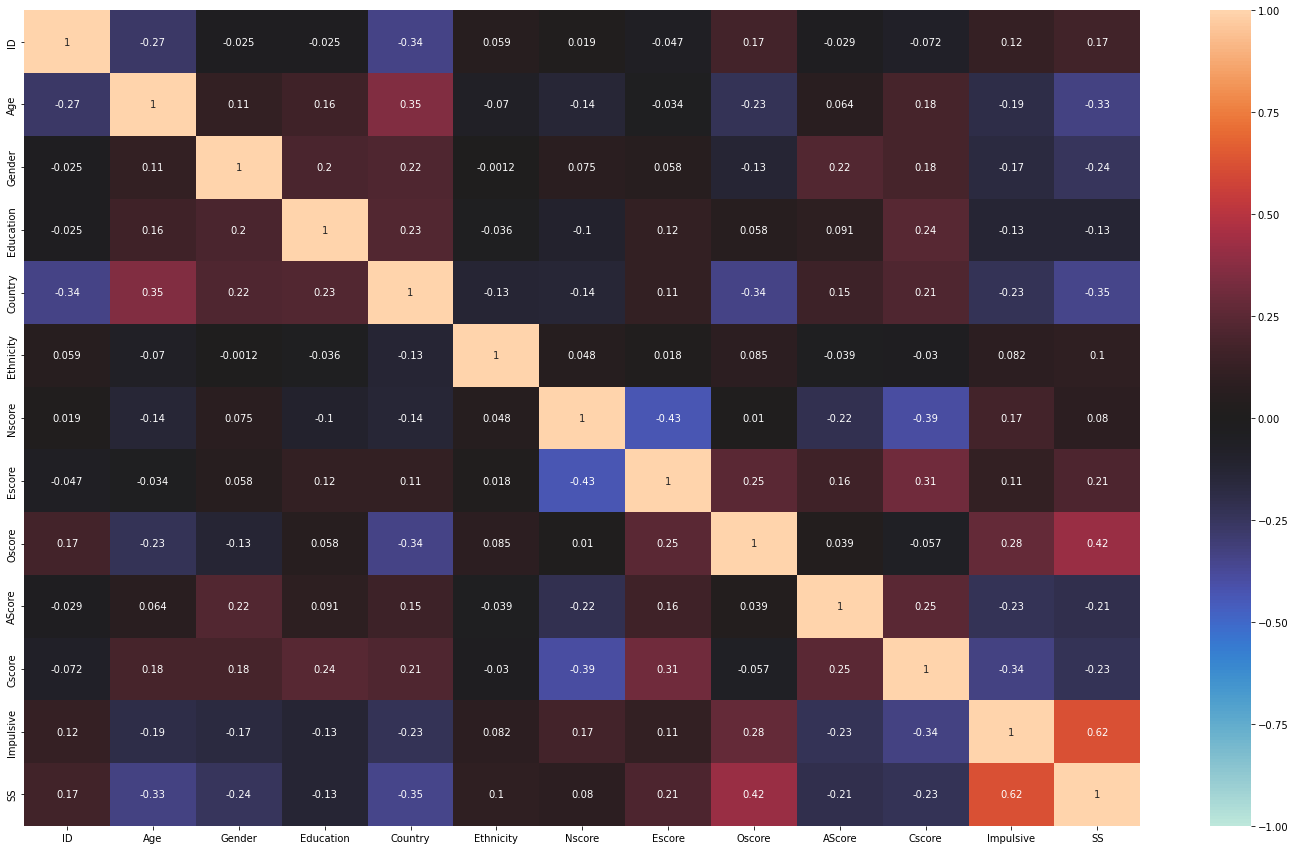

In [8]:
corr = df2.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True, vmin=-1,center=0)

In [9]:
inputs=df2.drop(['ID','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke',
'Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA'], axis=1)

In [10]:
target_vsa=df2['VSA']
target_ketamine=df2['Ketamine']
target_heroin=df2['Heroin']
target_nicotine=df2['Nicotine']
targe_lsdt=df2['LSD']
target_meth=df2['Meth']
super_targets=['target_ketamine','target_vsa','target_semer','target_nicotine','targe_lsdt','target_meth']

In [11]:
print(inputs.shape,target_vsa.shape)

(1885, 12) (1885,)


In [12]:
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier()
svm1 = svm.SVC(random_state=0)
neigh = KNeighborsClassifier(n_neighbors=5)

In [13]:
#Feature Selection :: ANOVA F-Values - Target=VSA

fval_selector=SelectKBest(f_classif,k=6)
x_kbest=fval_selector.fit_transform(inputs,target_vsa)
x_kbest.size
x_kbest.shape
X = pd.DataFrame(x_kbest)
X

,0,1,2,3,4,5
0,0.49788,0.96082,-0.58331,-0.00665,-0.21712,-1.18084
1,-0.07854,0.96082,1.43533,-0.14277,-0.71126,-0.21575
2,0.49788,0.96082,-0.84732,-1.01450,-1.37983,0.40148
3,-0.95197,0.96082,-0.01928,0.58489,-1.37983,-1.18084
4,0.49788,0.96082,-0.45174,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...
1880,-0.95197,-0.57009,1.88511,-1.13788,0.88113,1.92173
1881,-0.95197,-0.57009,0.58331,-1.51840,0.88113,0.76540
1882,-0.07854,-0.57009,-1.27553,-1.38502,0.52975,-0.52593
1883,-0.95197,-0.57009,0.29338,-2.57309,1.29221,1.22470


In [14]:
#Feature Selection :: ANOVA F-Values - Target=Ketamine

fval_selector=SelectKBest(f_classif,k=6)
x_kbest=fval_selector.fit_transform(inputs,target_ketamine)
x_kbest.size
x_kbest.shape
X_ke = pd.DataFrame(x_kbest)
X_ke

,0,1,2,3,4,5
0,0.49788,0.48246,-0.58331,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.43533,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.84732,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,-0.01928,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,-0.45174,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...
1880,-0.95197,0.48246,1.88511,-1.13788,0.88113,1.92173
1881,-0.95197,-0.48246,0.58331,-1.51840,0.88113,0.76540
1882,-0.07854,0.48246,-1.27553,-1.38502,0.52975,-0.52593
1883,-0.95197,0.48246,0.29338,-2.57309,1.29221,1.22470


In [15]:
#Feature Selection :: ANOVA F-Values - Target=Heroin

fval_selector=SelectKBest(f_classif,k=6)
x_kbest=fval_selector.fit_transform(inputs,target_heroin)
x_kbest.size
x_kbest.shape
X_he = pd.DataFrame(x_kbest)
X_he

,0,1,2,3,4,5
0,0.96082,0.31287,-0.58331,-0.91699,-0.21712,-1.18084
1,0.96082,-0.67825,1.43533,0.76096,-0.71126,-0.21575
2,0.96082,-0.46725,-0.84732,-1.62090,-1.37983,0.40148
3,0.96082,-0.14882,-0.01928,0.59042,-1.37983,-1.18084
4,0.96082,0.73545,-0.45174,-0.30172,-0.21712,-0.21575
...,...,...,...,...,...,...
1880,-0.57009,-1.19430,1.88511,0.76096,0.88113,1.92173
1881,-0.57009,-0.24649,0.58331,0.76096,0.88113,0.76540
1882,-0.57009,1.13281,-1.27553,-1.77200,0.52975,-0.52593
1883,-0.57009,0.91093,0.29338,-1.62090,1.29221,1.22470


In [16]:
#Feature Selection :: ANOVA F-Values - Target=Nicotine

fval_selector=SelectKBest(f_classif,k=6)
x_kbest=fval_selector.fit_transform(inputs,target_nicotine)
x_kbest.size
x_kbest.shape
X_ni = pd.DataFrame(x_kbest)
X_ni

,0,1,2,3,4,5
0,0.49788,0.96082,-0.58331,-0.00665,-0.21712,-1.18084
1,-0.07854,0.96082,1.43533,-0.14277,-0.71126,-0.21575
2,0.49788,0.96082,-0.84732,-1.01450,-1.37983,0.40148
3,-0.95197,0.96082,-0.01928,0.58489,-1.37983,-1.18084
4,0.49788,0.96082,-0.45174,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...
1880,-0.95197,-0.57009,1.88511,-1.13788,0.88113,1.92173
1881,-0.95197,-0.57009,0.58331,-1.51840,0.88113,0.76540
1882,-0.07854,-0.57009,-1.27553,-1.38502,0.52975,-0.52593
1883,-0.95197,-0.57009,0.29338,-2.57309,1.29221,1.22470


In [17]:
#Feature Selection :: ANOVA F-Values - Target=lSDT

fval_selector=SelectKBest(f_classif,k=6)
x_kbest=fval_selector.fit_transform(inputs,targe_lsdt)
x_kbest.size
x_kbest.shape
X_ls = pd.DataFrame(x_kbest)
X_ls

,0,1,2,3,4,5
0,0.49788,0.48246,0.96082,-0.58331,-0.21712,-1.18084
1,-0.07854,-0.48246,0.96082,1.43533,-0.71126,-0.21575
2,0.49788,-0.48246,0.96082,-0.84732,-1.37983,0.40148
3,-0.95197,0.48246,0.96082,-0.01928,-1.37983,-1.18084
4,0.49788,0.48246,0.96082,-0.45174,-0.21712,-0.21575
...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.57009,1.88511,0.88113,1.92173
1881,-0.95197,-0.48246,-0.57009,0.58331,0.88113,0.76540
1882,-0.07854,0.48246,-0.57009,-1.27553,0.52975,-0.52593
1883,-0.95197,0.48246,-0.57009,0.29338,1.29221,1.22470


In [18]:
#Feature Selection :: ANOVA F-Values - Target=Meth

fval_selector=SelectKBest(f_classif,k=6)
x_kbest=fval_selector.fit_transform(inputs,target_meth)
x_kbest.size
x_kbest.shape
X_me = pd.DataFrame(x_kbest)
X_me

,0,1,2,3,4,5
0,0.49788,0.96082,-0.58331,-0.00665,-0.21712,-1.18084
1,-0.07854,0.96082,1.43533,-0.14277,-0.71126,-0.21575
2,0.49788,0.96082,-0.84732,-1.01450,-1.37983,0.40148
3,-0.95197,0.96082,-0.01928,0.58489,-1.37983,-1.18084
4,0.49788,0.96082,-0.45174,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...
1880,-0.95197,-0.57009,1.88511,-1.13788,0.88113,1.92173
1881,-0.95197,-0.57009,0.58331,-1.51840,0.88113,0.76540
1882,-0.07854,-0.57009,-1.27553,-1.38502,0.52975,-0.52593
1883,-0.95197,-0.57009,0.29338,-2.57309,1.29221,1.22470


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, target_vsa, random_state=0)
X_train_ke, X_test_ke, y_train_ke, y_test_ke = train_test_split(X_ke, target_ketamine, random_state=0)
X_train_se, X_test_se, y_train_se, y_test_se = train_test_split(X_he, target_heroin, random_state=0)
X_train_ni, X_test_ni, y_train_ni, y_test_ni = train_test_split(X_ni, target_nicotine, random_state=0)
X_train_ls, X_test_ls, y_train_ls, y_test_ls = train_test_split(X_ls, targe_lsdt, random_state=0)
X_train_me, X_test_me, y_train_me, y_test_me = train_test_split(X_me, target_meth, random_state=0)

---------------------------Target Feature Name: VSA------------------------------
DT               precision    recall  f1-score   support

           0       0.88      0.90      0.89       411
           1       0.17      0.15      0.16        61

    accuracy                           0.80       472
   macro avg       0.52      0.52      0.52       472
weighted avg       0.79      0.80      0.79       472

RF               precision    recall  f1-score   support

           0       0.88      0.96      0.92       411
           1       0.25      0.08      0.12        61

    accuracy                           0.85       472
   macro avg       0.56      0.52      0.52       472
weighted avg       0.80      0.85      0.82       472

SVM               precision    recall  f1-score   support

           0       0.87      1.00      0.93       411
           1       1.00      0.00      0.00        61

    accuracy                           0.87       472
   macro avg       0.94      0.50   

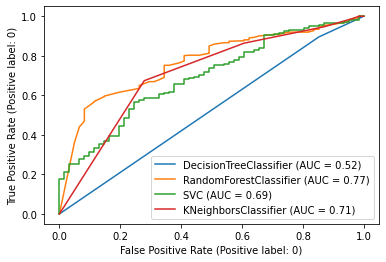

In [20]:
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm1.fit(X_train, y_train)
neigh.fit(X_train, y_train)

print("---------------------------Target Feature Name: VSA------------------------------")
y_pred_dt=dt.predict(X_test)
report_dt=print("DT",classification_report(y_test, y_pred_dt,zero_division=1))
y_pred_rf=rf.predict(X_test)
report_rf=print("RF",classification_report(y_test, y_pred_rf, zero_division=1))
y_pred_svm=svm1.predict(X_test)
report_svm=print("SVM",classification_report(y_test, y_pred_svm, zero_division=1))
y_pred_knn=neigh.predict(X_test)
report_neigh=print("KNN",classification_report(y_test, y_pred_knn, zero_division=1))

disp = plot_roc_curve(dt, X_test, y_test,pos_label='0')
plot_roc_curve(rf, X_test, y_test, ax=disp.ax_,pos_label='0')
plot_roc_curve(svm1, X_test, y_test, ax=disp.ax_,pos_label='0')
plot_roc_curve(neigh, X_test, y_test, ax=disp.ax_,pos_label='0');

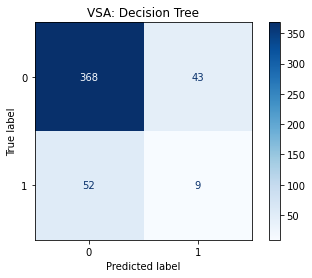

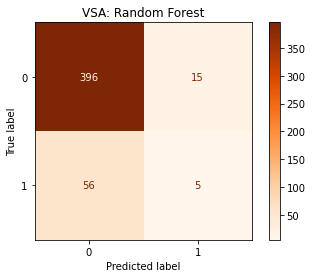

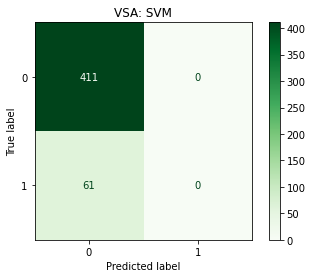

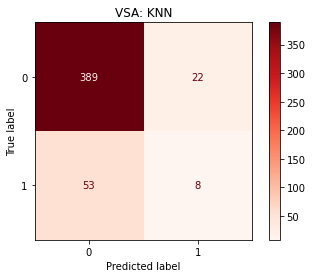

In [21]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_dt, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp=disp.plot(cmap=plt.cm.Blues,values_format='d') 
disp.ax_.set_title("VSA: Decision Tree")
plt.show()

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                              display_labels=rf.classes_)
disp_rf=disp_rf.plot(cmap=plt.cm.Oranges,values_format='d') 
disp_rf.ax_.set_title("VSA: Random Forest")
plt.show()

cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm1.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                              display_labels=svm1.classes_)
disp_svm=disp_svm.plot(cmap=plt.cm.Greens,values_format='d') 
disp_svm.ax_.set_title("VSA: SVM")
plt.show()

cm_knn = confusion_matrix(y_test, y_pred_knn, labels=neigh.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=neigh.classes_)
disp_knn=disp_knn.plot(cmap=plt.cm.Reds,values_format='d') 
disp_knn.ax_.set_title("VSA: KNN")
plt.show()

---------------------------Target Feature Name: Heroin------------------------------
DT               precision    recall  f1-score   support

           0       0.91      0.86      0.89       425
           1       0.15      0.21      0.17        47

    accuracy                           0.80       472
   macro avg       0.53      0.54      0.53       472
weighted avg       0.83      0.80      0.81       472

RF               precision    recall  f1-score   support

           0       0.91      0.97      0.94       425
           1       0.35      0.15      0.21        47

    accuracy                           0.89       472
   macro avg       0.63      0.56      0.57       472
weighted avg       0.86      0.89      0.87       472

SVM               precision    recall  f1-score   support

           0       0.90      1.00      0.95       425
           1       1.00      0.00      0.00        47

    accuracy                           0.90       472
   macro avg       0.95      0.50

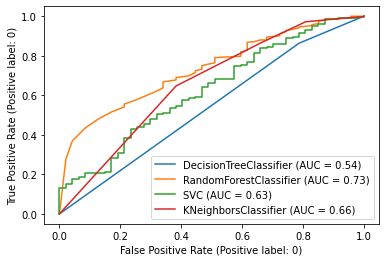

In [22]:
dt.fit(X_train_se, y_train_se)
rf.fit(X_train_se, y_train_se)
svm1.fit(X_train_se, y_train_se)
neigh.fit(X_train_se, y_train_se)
print("---------------------------Target Feature Name: Heroin------------------------------")

y_pred_dt_se=dt.predict(X_test_se)
report_dt=print("DT",classification_report(y_test_se, y_pred_dt_se,zero_division=1))
y_pred_rf_se=rf.predict(X_test_se)
report_rf=print("RF",classification_report(y_test_se, y_pred_rf_se, zero_division=1))
y_pred_svm_se=svm1.predict(X_test_se)
report_svm=print("SVM",classification_report(y_test_se, y_pred_svm_se, zero_division=1))
y_pred_knn_se=neigh.predict(X_test_se)
report_neigh=print("KNN",classification_report(y_test_se, y_pred_knn_se, zero_division=1))

disp = plot_roc_curve(dt, X_test_se, y_test_se,pos_label='0')
plot_roc_curve(rf, X_test_se, y_test_se, ax=disp.ax_,pos_label='0')
plot_roc_curve(svm1, X_test_se, y_test_se, ax=disp.ax_,pos_label='0')
plot_roc_curve(neigh, X_test_se, y_test_se, ax=disp.ax_,pos_label='0');

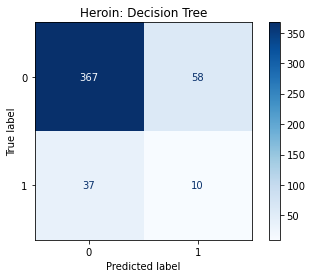

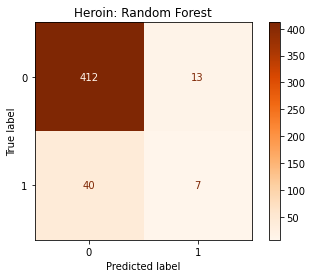

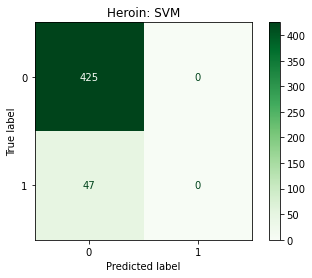

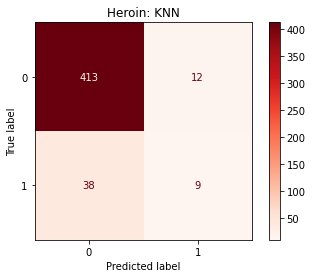

In [23]:
cm = confusion_matrix(y_test_se, y_pred_dt_se, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp=disp.plot(cmap=plt.cm.Blues,values_format='d') 
disp.ax_.set_title("Heroin: Decision Tree")
plt.show()

cm_rf = confusion_matrix(y_test_se, y_pred_rf_se, labels=rf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                              display_labels=rf.classes_)
disp_rf=disp_rf.plot(cmap=plt.cm.Oranges,values_format='d') 
disp_rf.ax_.set_title("Heroin: Random Forest")
plt.show()

cm_svm = confusion_matrix(y_test_se, y_pred_svm_se, labels=svm1.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                              display_labels=svm1.classes_)
disp_svm=disp_svm.plot(cmap=plt.cm.Greens,values_format='d') 
disp_svm.ax_.set_title("Heroin: SVM")
plt.show()

cm_knn = confusion_matrix(y_test_se, y_pred_knn_se, labels=neigh.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=neigh.classes_)
disp_knn=disp_knn.plot(cmap=plt.cm.Reds,values_format='d') 
disp_knn.ax_.set_title("Heroin: KNN")
plt.show()

---------------------------Target Feature Name: Ketamine------------------------------
DT               precision    recall  f1-score   support

           0       0.84      0.82      0.83       391
           1       0.23      0.26      0.24        81

    accuracy                           0.72       472
   macro avg       0.54      0.54      0.54       472
weighted avg       0.74      0.72      0.73       472

RF               precision    recall  f1-score   support

           0       0.84      0.94      0.89       391
           1       0.33      0.15      0.21        81

    accuracy                           0.80       472
   macro avg       0.59      0.54      0.55       472
weighted avg       0.75      0.80      0.77       472

SVM               precision    recall  f1-score   support

           0       0.83      1.00      0.91       391
           1       1.00      0.00      0.00        81

    accuracy                           0.83       472
   macro avg       0.91      0.

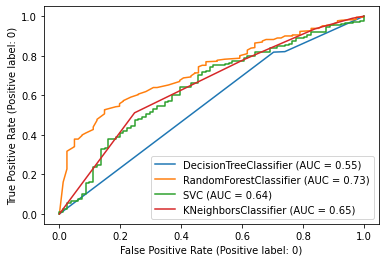

In [24]:
dt.fit(X_train_ke, y_train_ke)
rf.fit(X_train_ke, y_train_ke)
svm1.fit(X_train_ke, y_train_ke)
neigh.fit(X_train_ke, y_train_ke)
print("---------------------------Target Feature Name: Ketamine------------------------------")

y_pred_dt_ke=dt.predict(X_test_ke)
report_dt=print("DT",classification_report(y_test_ke, y_pred_dt_ke,zero_division=1))
y_pred_rf_ke=rf.predict(X_test_ke)
report_rf=print("RF",classification_report(y_test_ke, y_pred_rf_ke, zero_division=1))
y_pred_svm_ke=svm1.predict(X_test_ke)
report_svm=print("SVM",classification_report(y_test_ke, y_pred_svm_ke, zero_division=1))
y_pred_knn_ke=neigh.predict(X_test_ke)
report_neigh=print("KNN",classification_report(y_test_ke, y_pred_knn_ke, zero_division=1))

disp = plot_roc_curve(dt, X_test_ke, y_test_ke,pos_label='0')
plot_roc_curve(rf, X_test_ke, y_test_ke, ax=disp.ax_, pos_label='0')
plot_roc_curve(svm1, X_test_ke, y_test_ke, ax=disp.ax_, pos_label='0')
plot_roc_curve(neigh, X_test_ke, y_test_ke, ax=disp.ax_, pos_label='0');

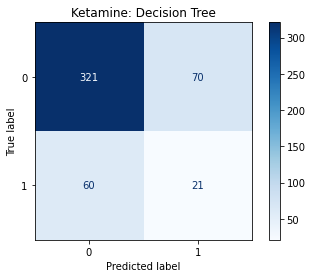

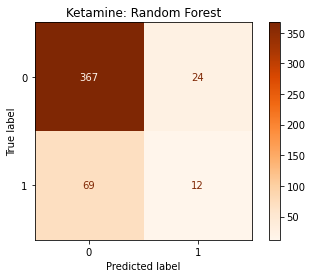

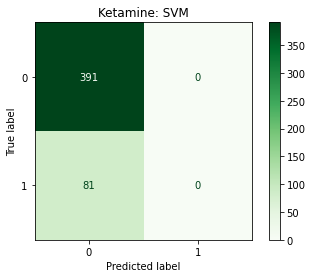

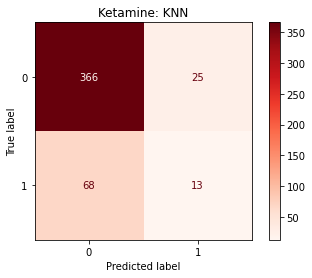

In [25]:
cm = confusion_matrix(y_test_ke, y_pred_dt_ke, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp=disp.plot(cmap=plt.cm.Blues,values_format='d') 
disp.ax_.set_title("Ketamine: Decision Tree")
plt.show()

cm_rf = confusion_matrix(y_test_ke, y_pred_rf_ke, labels=rf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                              display_labels=rf.classes_)
disp_rf=disp_rf.plot(cmap=plt.cm.Oranges,values_format='d') 
disp_rf.ax_.set_title("Ketamine: Random Forest")
plt.show()

cm_svm = confusion_matrix(y_test_ke, y_pred_svm_ke, labels=svm1.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                              display_labels=svm1.classes_)
disp_svm=disp_svm.plot(cmap=plt.cm.Greens,values_format='d') 
disp_svm.ax_.set_title("Ketamine: SVM")
plt.show()

cm_knn = confusion_matrix(y_test_ke, y_pred_knn_ke, labels=neigh.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=neigh.classes_)
disp_knn=disp_knn.plot(cmap=plt.cm.Reds,values_format='d') 
disp_knn.ax_.set_title("Ketamine: KNN")
plt.show()

---------------------------Target Feature Name: Nicotine------------------------------
DT               precision    recall  f1-score   support

           0       0.47      0.45      0.46       153
           1       0.74      0.76      0.75       319

    accuracy                           0.66       472
   macro avg       0.61      0.60      0.60       472
weighted avg       0.65      0.66      0.65       472

RF               precision    recall  f1-score   support

           0       0.56      0.41      0.47       153
           1       0.75      0.85      0.80       319

    accuracy                           0.71       472
   macro avg       0.66      0.63      0.63       472
weighted avg       0.69      0.71      0.69       472

SVM               precision    recall  f1-score   support

           0       0.60      0.42      0.50       153
           1       0.76      0.87      0.81       319

    accuracy                           0.72       472
   macro avg       0.68      0.

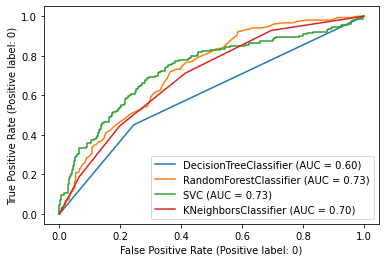

In [26]:
dt.fit(X_train_ni, y_train_ni)
rf.fit(X_train_ni, y_train_ni)
svm1.fit(X_train_ni, y_train_ni)
neigh.fit(X_train_ni, y_train_ni)
print("---------------------------Target Feature Name: Nicotine------------------------------")

y_pred_dt_ni=dt.predict(X_test_ni)
report_dt=print("DT",classification_report(y_test_ni, y_pred_dt_ni,zero_division=1))
y_pred_rf_ni=rf.predict(X_test_ni)
report_rf=print("RF",classification_report(y_test_ni, y_pred_rf_ni, zero_division=1))
y_pred_svm_ni=svm1.predict(X_test_ni)
report_svm=print("SVM",classification_report(y_test_ni, y_pred_svm_ni, zero_division=1))
y_pred_knn_ni=neigh.predict(X_test_ni)
report_neigh=print("KNN",classification_report(y_test_ni, y_pred_knn_ni, zero_division=1))

disp = plot_roc_curve(dt, X_test_ni, y_test_ni,pos_label='0')
plot_roc_curve(rf, X_test_ni, y_test_ni, ax=disp.ax_,pos_label='0')
plot_roc_curve(svm1, X_test_ni, y_test_ni, ax=disp.ax_,pos_label='0')
plot_roc_curve(neigh, X_test_ni, y_test_ni, ax=disp.ax_,pos_label='0');

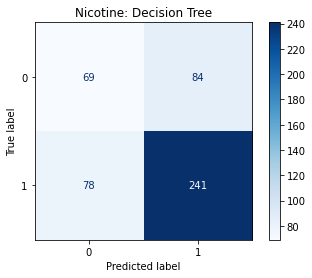

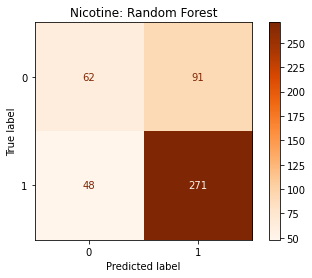

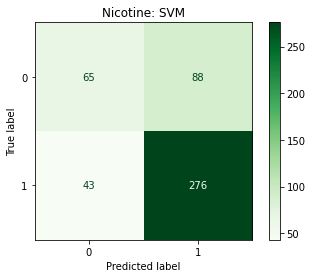

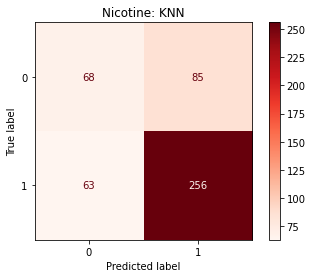

In [27]:
cm = confusion_matrix(y_test_ni, y_pred_dt_ni, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp=disp.plot(cmap=plt.cm.Blues,values_format='d') 
disp.ax_.set_title("Nicotine: Decision Tree")
plt.show()

cm_rf = confusion_matrix(y_test_ni, y_pred_rf_ni, labels=rf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                              display_labels=rf.classes_)
disp_rf=disp_rf.plot(cmap=plt.cm.Oranges,values_format='d') 
disp_rf.ax_.set_title("Nicotine: Random Forest")
plt.show()

cm_svm = confusion_matrix(y_test_ni, y_pred_svm_ni, labels=svm1.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                              display_labels=svm1.classes_)
disp_svm=disp_svm.plot(cmap=plt.cm.Greens,values_format='d') 
disp_svm.ax_.set_title("Nicotine: SVM")
plt.show()

cm_knn = confusion_matrix(y_test_ni, y_pred_knn_ni, labels=neigh.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=neigh.classes_)
disp_knn=disp_knn.plot(cmap=plt.cm.Reds,values_format='d') 
disp_knn.ax_.set_title("Nicotine: KNN")
plt.show()

---------------------------Target Feature Name: LSDT------------------------------
DT               precision    recall  f1-score   support

           0       0.84      0.82      0.83       344
           1       0.54      0.59      0.56       128

    accuracy                           0.75       472
   macro avg       0.69      0.70      0.70       472
weighted avg       0.76      0.75      0.76       472

RF               precision    recall  f1-score   support

           0       0.84      0.87      0.86       344
           1       0.62      0.57      0.59       128

    accuracy                           0.79       472
   macro avg       0.73      0.72      0.73       472
weighted avg       0.78      0.79      0.79       472

SVM               precision    recall  f1-score   support

           0       0.88      0.86      0.87       344
           1       0.64      0.70      0.67       128

    accuracy                           0.81       472
   macro avg       0.76      0.78  

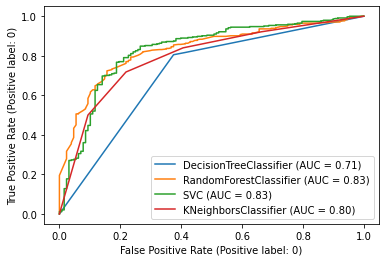

In [28]:
dt.fit(X_train_ls, y_train_ls)
rf.fit(X_train_ls, y_train_ls)
svm1.fit(X_train_ls, y_train_ls)
neigh.fit(X_train_ls, y_train_ls)
print("---------------------------Target Feature Name: LSDT------------------------------")

y_pred_dt_ls=dt.predict(X_test_ls)
report_dt=print("DT",classification_report(y_test_ls, y_pred_dt_ls,zero_division=1))
y_pred_rf_ls=rf.predict(X_test_ls)
report_rf=print("RF",classification_report(y_test_ls, y_pred_rf_ls, zero_division=1))
y_pred_svm_ls=svm1.predict(X_test_ls)
report_svm=print("SVM",classification_report(y_test_ls, y_pred_svm_ls, zero_division=1))
y_pred_knn_ls=neigh.predict(X_test_ls)
report_neigh=print("KNN",classification_report(y_test_ls, y_pred_knn_ls, zero_division=1))

disp = plot_roc_curve(dt, X_test_ls, y_test_ls,pos_label='0')
plot_roc_curve(rf, X_test_ls, y_test_ls, ax=disp.ax_,pos_label='0')
plot_roc_curve(svm1, X_test_ls, y_test_ls, ax=disp.ax_,pos_label='0')
plot_roc_curve(neigh, X_test_ls, y_test_ls, ax=disp.ax_,pos_label='0');

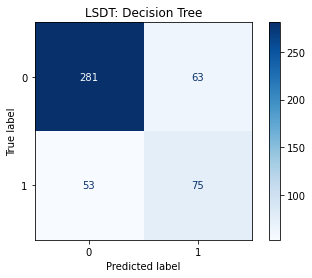

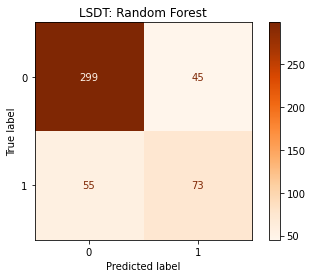

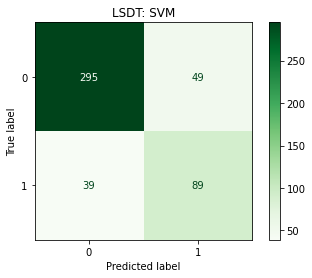

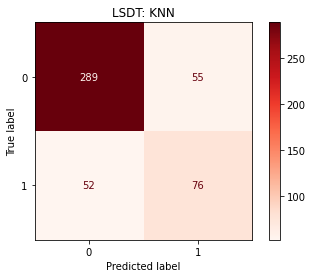

In [29]:
cm = confusion_matrix(y_test_ls, y_pred_dt_ls, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp=disp.plot(cmap=plt.cm.Blues,values_format='d') 
disp.ax_.set_title("LSDT: Decision Tree")
plt.show()

cm_rf = confusion_matrix(y_test_ls, y_pred_rf_ls, labels=rf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                              display_labels=rf.classes_)
disp_rf=disp_rf.plot(cmap=plt.cm.Oranges,values_format='d') 
disp_rf.ax_.set_title("LSDT: Random Forest")
plt.show()

cm_svm = confusion_matrix(y_test_ls, y_pred_svm_ls, labels=svm1.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                              display_labels=svm1.classes_)
disp_svm=disp_svm.plot(cmap=plt.cm.Greens,values_format='d') 
disp_svm.ax_.set_title("LSDT: SVM")
plt.show()

cm_knn = confusion_matrix(y_test_ls, y_pred_knn_ls, labels=neigh.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=neigh.classes_)
disp_knn=disp_knn.plot(cmap=plt.cm.Reds,values_format='d') 
disp_knn.ax_.set_title("LSDT: KNN")
plt.show()

---------------------------Target Feature Name: Meth------------------------------
DT               precision    recall  f1-score   support

           0       0.83      0.81      0.82       366
           1       0.39      0.42      0.41       106

    accuracy                           0.72       472
   macro avg       0.61      0.62      0.61       472
weighted avg       0.73      0.72      0.73       472

RF               precision    recall  f1-score   support

           0       0.82      0.90      0.86       366
           1       0.50      0.33      0.40       106

    accuracy                           0.78       472
   macro avg       0.66      0.62      0.63       472
weighted avg       0.75      0.78      0.76       472

SVM               precision    recall  f1-score   support

           0       0.81      0.96      0.88       366
           1       0.62      0.22      0.32       106

    accuracy                           0.79       472
   macro avg       0.72      0.59  

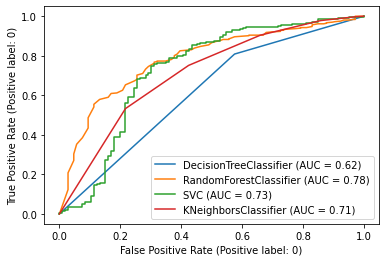

In [30]:
dt.fit(X_train_me, y_train_me)
rf.fit(X_train_me, y_train_me)
svm1.fit(X_train_me, y_train_me)
neigh.fit(X_train_me, y_train_me)
print("---------------------------Target Feature Name: Meth------------------------------")

y_pred_dt_me=dt.predict(X_test_me)
report_dt=print("DT",classification_report(y_test_me, y_pred_dt_me,zero_division=1))
y_pred_rf_me=rf.predict(X_test_me)
report_rf=print("RF",classification_report(y_test_me, y_pred_rf_me, zero_division=1))
y_pred_svm_me=svm1.predict(X_test_me)
report_svm=print("SVM",classification_report(y_test_me, y_pred_svm_me, zero_division=1))
y_pred_knn_me=neigh.predict(X_test_me)
report_neigh=print("KNN",classification_report(y_test_me, y_pred_knn_me, zero_division=1))
print(dt)
disp = plot_roc_curve(dt, X_test_me, y_test_me,pos_label='0')
plot_roc_curve(rf, X_test_me, y_test_me, ax=disp.ax_,pos_label='0')
plot_roc_curve(svm1, X_test_me, y_test_me, ax=disp.ax_,pos_label='0')
plot_roc_curve(neigh, X_test_me, y_test_me, ax=disp.ax_,pos_label='0');


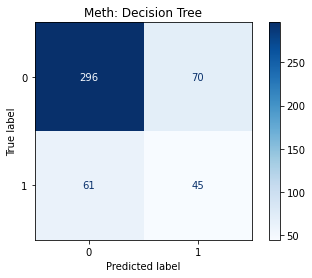

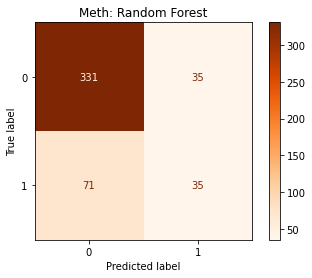

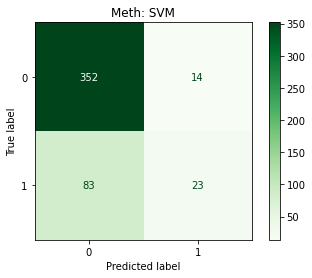

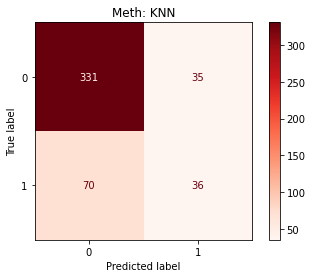

In [31]:
cm = confusion_matrix(y_test_me, y_pred_dt_me, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp=disp.plot(cmap=plt.cm.Blues,values_format='d') 
disp.ax_.set_title("Meth: Decision Tree")
plt.show()

cm_rf = confusion_matrix(y_test_me, y_pred_rf_me, labels=rf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                              display_labels=rf.classes_)
disp_rf=disp_rf.plot(cmap=plt.cm.Oranges,values_format='d') 
disp_rf.ax_.set_title("Meth: Random Forest")
plt.show()

cm_svm = confusion_matrix(y_test_me, y_pred_svm_me, labels=svm1.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                              display_labels=svm1.classes_)
disp_svm=disp_svm.plot(cmap=plt.cm.Greens,values_format='d') 
disp_svm.ax_.set_title("Meth: SVM")
plt.show()

cm_knn = confusion_matrix(y_test_me, y_pred_knn_me, labels=neigh.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=neigh.classes_)
disp_knn=disp_knn.plot(cmap=plt.cm.Reds,values_format='d') 
disp_knn.ax_.set_title("Meth: KNN")
plt.show()